<a href="https://colab.research.google.com/github/weslei-silva87/Analise-Churn---empresa-Telco/blob/main/Analise_Churn_Telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1) Qual mês e o mais critico ?



2) Qual e a taxa media de churn?


3) a taxa churn diminui ao longo do tempo ?

 4) Qual e o meio de pagamento que impacta na taxa churn ?

5) Qual produto tem a maior taxa de churn?

6) Qual o mês de fidelização do Cliente ?

7) Prevendo quem esta entrando em shurn?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Carregamento dos Dados
tabela = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
tabela.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:

# Selecionar apenas as colunas necessárias para alise churn: customerID, tenure e Churn
tabela_nova = tabela[['customerID', 'tenure', 'Churn']]

# Exibir as primeiras linhas do dataframe resultante
print(tabela_nova.head())


   customerID  tenure Churn
0  7590-VHVEG       1    No
1  5575-GNVDE      34    No
2  3668-QPYBK       2   Yes
3  7795-CFOCW      45    No
4  9237-HQITU       2   Yes


In [ ]:
# Analise inicial
#Taxa de churn

churn_counts = tabela['Churn'].value_counts(normalize=True) * 100
display(churn_counts)


No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Taxa de churn e de 26%

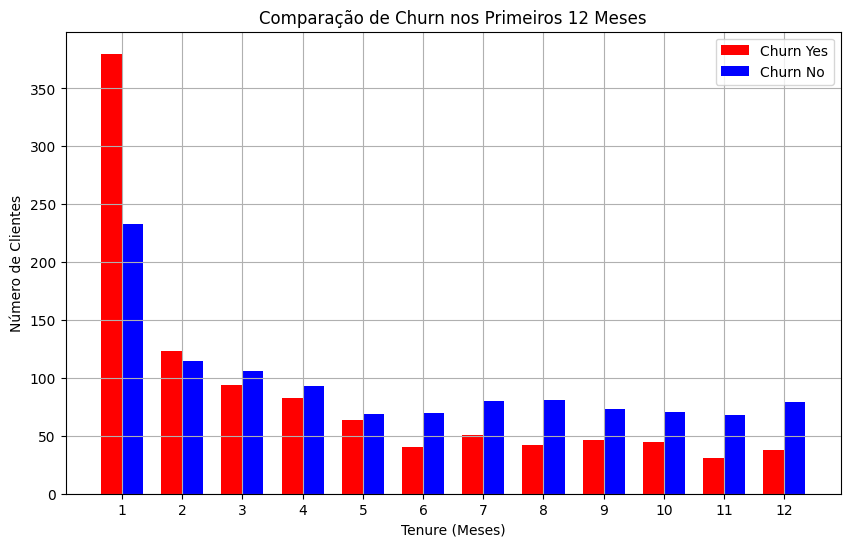

In [ ]:

# Selecionar apenas as colunas necessárias para a nova tabela: tenure e Churn
nova_tabela = tabela[['tenure', 'Churn']]

# Filtrar para incluir apenas os primeiros 12 meses
nova_tabela = nova_tabela[nova_tabela['tenure'] <= 12]

# Criar uma série para cada categoria de churn
contagem_churn = nova_tabela[nova_tabela['Churn'] == 'Yes']['tenure'].value_counts().sort_index()
contagem_nao_churn = nova_tabela[nova_tabela['Churn'] == 'No']['tenure'].value_counts().sort_index()

# Garantir que ambas as séries tenham o mesmo comprimento
maiores_tenure = max(contagem_churn.index.max(), contagem_nao_churn.index.max())
contagem_nao_churn = contagem_nao_churn.reindex(range(1, maiores_tenure + 1), fill_value=0)

# Definir a largura das barras e as posições dos grupos
largura_barra = 0.35
posicoes = np.arange(len(contagem_churn))

# Plotar o gráfico de barras lado a lado
plt.figure(figsize=(10, 6))
plt.bar(posicoes - largura_barra/2, contagem_churn, largura_barra, color='red', label='Churn Yes')
plt.bar(posicoes + largura_barra/2, contagem_nao_churn, largura_barra, color='blue', label='Churn No')
plt.xlabel('Tenure (Meses)')
plt.ylabel('Número de Clientes')
plt.title('Comparação de Churn nos Primeiros 12 Meses')
plt.xticks(posicoes, contagem_churn.index)
plt.legend()
plt.grid(True)
plt.show()


Primeiro Mes e o mais critico para os clientes permanecer

O mês de fidelização e o 2 mês Logo a pos este Mês a taxa Cai


Taxa cai ao longo do tempo SIM

In [ ]:
# Meio de pagamento
#Criando nova tabela


# Selecionar as colunas necessárias para o novo DataFrame
tabela_pag = tabela[['customerID', 'PaymentMethod', 'Churn']]

# Exibir as primeiras linhas do novo DataFrame
print(tabela_pag.head())


   customerID              PaymentMethod Churn
0  7590-VHVEG           Electronic check    No
1  5575-GNVDE               Mailed check    No
2  3668-QPYBK               Mailed check   Yes
3  7795-CFOCW  Bank transfer (automatic)    No
4  9237-HQITU           Electronic check   Yes


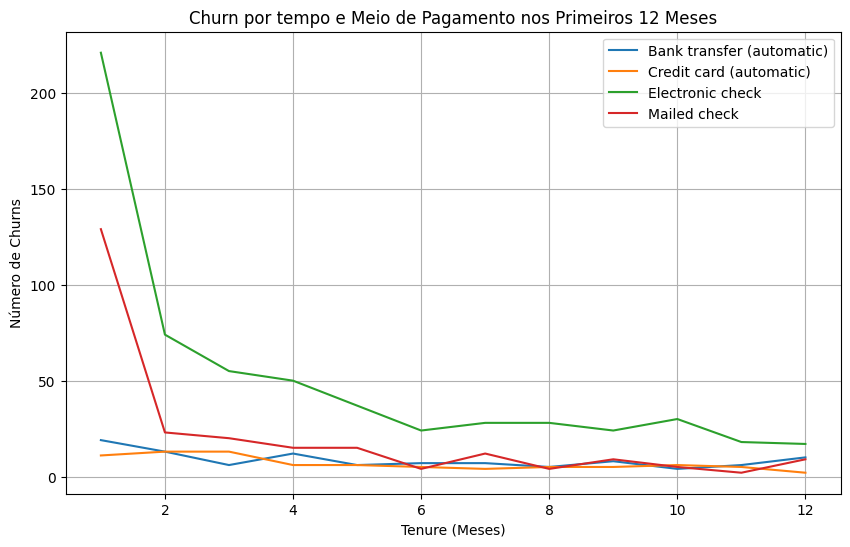

In [ ]:

#Grafico mostrando Meios de Pagamento

# Selecionar as colunas necessárias para o novo DataFrame e filtrar os primeiros 12 meses
nova_tabela = tabela[['tenure', 'PaymentMethod', 'Churn']]
nova_tabela = nova_tabela[nova_tabela['tenure'] <= 12]

# Contar o número de churns para cada meio de pagamento e tenure
contagem_churn = nova_tabela[nova_tabela['Churn'] == 'Yes'].groupby(['PaymentMethod', 'tenure']).size()

# Reorganizar os dados para que cada método de pagamento seja uma coluna
contagem_churn = contagem_churn.unstack(level=0)

# Plotar o gráfico de linhas
plt.figure(figsize=(10, 6))
for metodo_pagamento in contagem_churn.columns:
    plt.plot(contagem_churn.index, contagem_churn[metodo_pagamento], label=metodo_pagamento)

plt.xlabel('Tenure (Meses)')
plt.ylabel('Número de Churns')
plt.title('Churn por tempo e Meio de Pagamento nos Primeiros 12 Meses')
plt.legend()
plt.grid(True)
plt.show()


Meio de Pagamento com Maior Churn "ELETRONIC CHECK"

In [ ]:
# Qual plano tem o maior Churn

# Selecionar as colunas necessárias para o novo DataFrame
nova_tabela = tabela[['customerID', 'Contract', 'Churn']]

# Exibir as primeiras linhas do novo DataFrame
print(nova_tabela.head())


   customerID        Contract Churn
0  7590-VHVEG  Month-to-month    No
1  5575-GNVDE        One year    No
2  3668-QPYBK  Month-to-month   Yes
3  7795-CFOCW        One year    No
4  9237-HQITU  Month-to-month   Yes


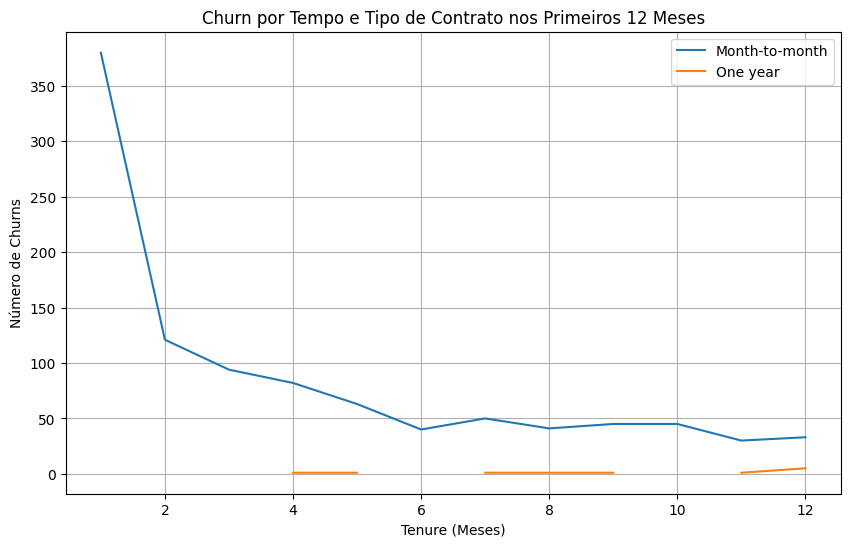

In [ ]:

# Selecionar as colunas necessárias para o novo DataFrame e filtrar os primeiros 12 meses
nova_tabela = tabela[['tenure', 'Contract', 'Churn']]
nova_tabela = nova_tabela[nova_tabela['tenure'] <= 12]

# Contar o número de churns para cada tipo de contrato e tenure
contagem_churn = nova_tabela[nova_tabela['Churn'] == 'Yes'].groupby(['Contract', 'tenure']).size()

# Reorganizar os dados para que cada tipo de contrato seja uma coluna
contagem_churn = contagem_churn.unstack(level=0)

# Plotar o gráfico de linhas
plt.figure(figsize=(10, 6))
for tipo_contrato in contagem_churn.columns:
    plt.plot(contagem_churn.index, contagem_churn[tipo_contrato], label=tipo_contrato)

plt.xlabel('Tenure (Meses)')
plt.ylabel('Número de Churns')
plt.title('Churn por Tempo e Tipo de Contrato nos Primeiros 12 Meses')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

# Carregar o dataset (substitua 'seu_arquivo.csv' pelo nome do seu arquivo)
tabela = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Selecionar as colunas necessárias
dados = tabela[['Contract', 'PaymentMethod', 'tenure', 'Churn']]

# Codificar as variáveis categóricas
encoder = LabelEncoder()
dados['Contract'] = encoder.fit_transform(dados['Contract'])
dados['PaymentMethod'] = encoder.fit_transform(dados['PaymentMethod'])
dados['Churn'] = encoder.fit_transform(dados['Churn'])

# Separar os dados em features (X) e target (y)
X = dados.drop('Churn', axis=1)
y = dados['Churn']

# Dividir os dados em conjuntos de treinamento e teste (70% treinamento, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escolher o modelo (usaremos Árvore de Decisão)
modelo = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
modelo.fit(X_train, y_train)

# Avaliar o modelo
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)


Acurácia do modelo: 0.7595835305253195


<ipython-input-40-6e2fe64ac4f1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Contract'] = encoder.fit_transform(dados['Contract'])
<ipython-input-40-6e2fe64ac4f1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['PaymentMethod'] = encoder.fit_transform(dados['PaymentMethod'])
<ipython-input-40-6e2fe64ac4f1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

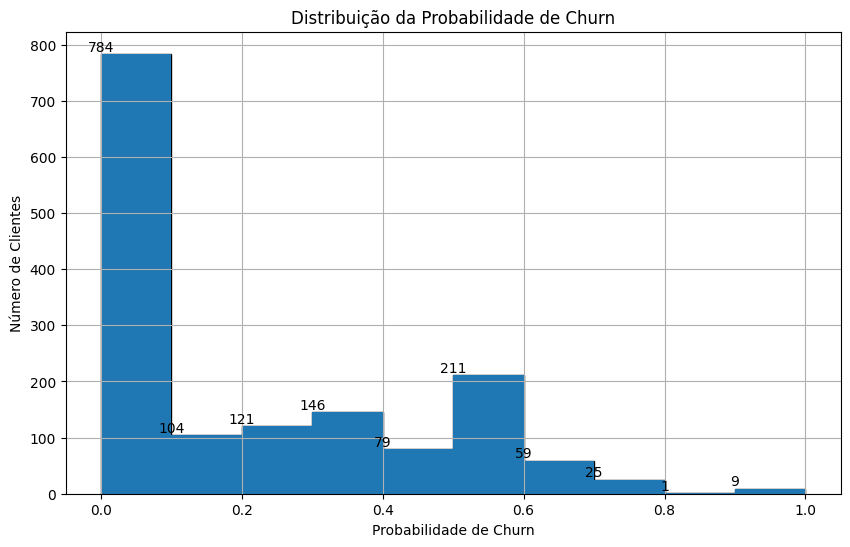

In [ ]:

# Criar uma nova figura e eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Gerar histograma da probabilidade de churn
ax.hist(resultado_nao_churn['Predicted Churn Probability'], bins=10, color='skyblue', edgecolor='black')
ax.set_title('Distribuição da Probabilidade de Churn')
ax.set_xlabel('Probabilidade de Churn')
ax.set_ylabel('Número de Clientes')
ax.grid(True)

# Adicionar os valores de cada barra
for i, freq in enumerate(ax.hist(resultado_nao_churn['Predicted Churn Probability'], bins=10)[0]):
    ax.text(ax.hist(resultado_nao_churn['Predicted Churn Probability'], bins=10)[1][i], freq + 5, str(int(freq)), ha='center', color='black')

plt.show()

In [ ]:


# Filtrar os clientes com probabilidade de churn de 70 a 100
clientes_churn_alto = resultado_nao_churn[(resultado_nao_churn['Predicted Churn Probability'] >= 0.7) & (resultado_nao_churn['Predicted Churn Probability'] <= 1.0)]

# Adicionar os IDs dos clientes
clientes_churn_alto['CustomerID'] = tabela.loc[clientes_churn_alto.index, 'customerID']

# Exibir a tabela
print("Clientes com probabilidade de churn de 70 a 100:")
display(clientes_churn_alto[['CustomerID', 'Predicted Churn Probability', 'True Churn']].head(20))


Clientes com probabilidade de churn de 70 a 100:


<ipython-input-68-147e6661ce50>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_churn_alto['CustomerID'] = tabela.loc[clientes_churn_alto.index, 'customerID']


,CustomerID,Predicted Churn Probability,True Churn
3328,1640-PLFMP,0.743719,0
101,3679-XASPY,0.743719,0
1075,4194-WHFCB,1.000000,0
5354,4273-MBHYA,0.743719,0
5753,7636-XUHWW,0.727273,0
752,1410-RSCMR,0.800000,0
5107,9633-DENPU,1.000000,0
31,4929-XIHVW,0.727273,0
5682,3841-CONLJ,0.743719,0
5844,2905-KFQUV,0.727273,0


In [ ]:
# Adicionar a coluna 'CustomerID' ao DataFrame clientes_churn_alto
clientes_churn_alto['CustomerID'] = tabela.loc[clientes_churn_alto.index, 'customerID']

# Salvar a tabela em um arquivo CSV
clientes_churn_alto.to_csv('clientes_churn_alto_com_ids.csv', index=False)
print("Tabela salva como 'clientes_churn_alto_com_ids.csv'.")


Tabela salva como 'clientes_churn_alto_com_ids.csv'.


<ipython-input-70-cd0b015dfbe0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_churn_alto['CustomerID'] = tabela.loc[clientes_churn_alto.index, 'customerID']
